<a href="https://colab.research.google.com/github/Morsalah/OULAD-StudentWithdrawalPrediction-FinalProject/blob/main/FinalProject_EDALevel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Cleaned Data Tables

In [ ]:
import pandas as pd

Courses = pd.read_csv('Courses_cleaned.csv')
Assessments = pd.read_csv('Assessments_cleaned.csv')
Vle = pd.read_csv('Vle_cleaned.csv')

StudentInfo = pd.read_csv('StudentInfo_cleaned.csv')

StudentAssessment = pd.read_csv('StudentAssessment_cleaned.csv')
StudentRegistration= pd.read_csv('StudentRegistration_cleaned.csv')
StudentVle= pd.read_csv('StudentVle_cleaned.csv')

# Create the dictionary
University_Learning_Analytics_datasetData = {
    'Courses': Courses,
    'Assessments': Assessments,
    'Vle': Vle,
    'StudentInfo': StudentInfo,
    'StudentAssessment': StudentAssessment,
    'StudentRegistration': StudentRegistration,
    'StudentVle': StudentVle
                                              }

# Merging Data Tables

In [ ]:
import pandas as pd
'''
# Merge `courses` and `assessments` on `code_module` and `code_presentation`
courses_assessments = pd.merge(Courses, Assessments, on=['code_module', 'code_presentation'], how='inner')

# Merge the result with `student_info` on `code_module`, `code_presentation`, and `id_student`
courses_assessments_info = pd.merge(courses_assessments, StudentInfo, on=['code_module', 'code_presentation'], how='inner')

# Merge with `student_registration` on `code_module`, `code_presentation`, and `id_student`
courses_assessments_info_registration = pd.merge(courses_assessments_info, StudentRegistration, on=['code_module', 'code_presentation', 'id_student'], how='inner')

# Merge with `student_assessment` on `id_assessment` and `id_student`
courses_assessments_info_registration_assessment = pd.merge(courses_assessments_info_registration, StudentAssessment, on=['id_assessment', 'id_student'], how='inner')

# Merge with `vle` on `code_module`, `code_presentation`
# Too heavy files canot be joined
courses_assessments_info_registration_assessment_vle = pd.merge(courses_assessments_info_registration_assessment, Vle, on=['code_module', 'code_presentation'], how='inner')

# Merge the final result with `student_vle` on `code_module`, `code_presentation`, `id_student`, and `id_site`
#complete_data = pd.merge(courses_assessments_info_registration_assessment_vle, StudentVle, on=['code_module', 'code_presentation', 'id_student', 'id_site'], how='inner')

# Show the structure of the merged dataset
#print(complete_data.shape)
#print(complete_data.head())
'''

# EDA Level 1 : For Each Table
 * This phase includes EDA for each data table individually
 1. Exploring each feature by its data type - Numeric/Object
 2. Exploring grouping/aggregating features with each other by intuitive correlation

### **1. `courses.csv`: Module and Presentation Analysis**
- **Goals**: Understand module durations and differences between "B" (February) and "J" (October) presentations.
- **Plots and Analyses**:
  - **Module Duration Histogram**: Plot `length` to visualize the distribution of module durations.
  - **Presentation Comparison**: Separate "B" and "J" presentations and compare their distributions to see if they significantly differ in length or structure.
  - **Module Count by Presentation**: Use a bar plot to count how many modules have only "B" or "J" presentations. This could reveal which modules are offered less frequently.

### **2. `assessments.csv`: Assessment Types and Weights**
- **Goals**: Examine the different types of assessments, their distribution, and weight assignments across modules.
- **Plots and Analyses**:
  - **Assessment Type Distribution**: A count plot for `assessment_type` to see the prevalence of each type (TMA, CMA, Exam).
  - **Assessment Weight Analysis**: Use a box plot or violin plot to visualize the `weight` distribution across assessment types and modules. This can show how different assessments contribute to the final grade.
  - **Final Submission Dates**: For each module, visualize the `date` distribution (histogram or line plot) to identify any assessment clustering or gaps over time.

### **3. `vle.csv`: Module Material Utilization**
- **Goals**: Understand the types of online learning materials available and their planned usage periods.
- **Plots and Analyses**:
  - **Activity Type Distribution**: A bar plot for `activity_type` to see which types of materials are most common.
  - **Usage Period Heatmap**: A heatmap of `week_from` to `week_to` for each `code_module` and `activity_type` could help visualize when each type of material is available and if certain modules have more extensive online support.

### **4. `studentInfo.csv`: Demographics and Final Results**
- **Goals**: Explore student demographics, past attempts, disabilities, and final results.
- **Plots and Analyses**:
  - **Final Result Distribution**: A count plot for `final_result` to see success rates across modules.
  - **Demographic Breakdown**: Count plots for `gender`, `age_band`, `highest_education`, and `region` to understand the student body composition.
  - **IMD Band and Disability Analysis**: Investigate if there’s a correlation between `imd_band` (socioeconomic status) or `disability` and `final_result`.
  - **Previous Attempts and Success Rate**: A bar plot to examine if `num_of_prev_attempts` impacts the likelihood of passing, failing, or withdrawing from a course.

### **5. `studentRegistration.csv`: Registration Patterns**
- **Goals**: Analyze registration and unregistration behavior.
- **Plots and Analyses**:
  - **Registration Date Histogram**: Plot `date_registration` to see when students typically register relative to the course start.
  - **Unregistration Timeline**: Plot `date_unregistration` (for those who unregistered) to observe if there are patterns in drop-out timing.
  - **Withdrawal vs Completion Rates**: Compare completion and withdrawal rates across modules and presentations to see if specific modules have higher dropout rates.

### **6. `studentAssessment.csv`: Assessment Performance**
- **Goals**: Analyze student performance in assessments and the timing of submissions.
- **Plots and Analyses**:
  - **Score Distribution**: Histogram for `score` to understand overall performance, possibly highlighting the passing threshold (score > 40).
  - **Submission Timing**: A line or bar plot for `date_submitted` to see if students tend to submit early, on time, or late.
  - **Assessment Type Performance**: Compare scores across `assessment_type` to identify if performance varies by assessment type (e.g., students may perform better in TMAs than Exams).

### **7. `studentVle.csv`: Interaction with VLE Materials**
- **Goals**: Examine student engagement with online resources and how it may correlate with their performance.
- **Plots and Analyses**:
  - **Interaction Frequency**: Histogram of `sum_click` to visualize engagement levels with VLE materials.
  - **Weekly Interaction Trends**: Plot `date` vs. `sum_click` (aggregated by week) to observe engagement over time and see if interaction rates change as exams or deadlines approach.
  - **Correlation with Final Result**: Group interactions by `final_result` to explore if high engagement correlates with better outcomes.


 1. Exploring each feature by its data type - Numeric/Object

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def DistributionPlot(data):
    sns.set(style="whitegrid")

    for feature in data.columns:
        plt.figure(figsize=(10, 6))
        if data[feature].dtype == 'object' or data[feature].dtype.name == 'category':
            # Use seaborn's barplot for string data
            sns.countplot(data=data, x=feature, palette='husl', hue=data[feature], legend=False)
            plt.title(f'{feature} Distribution')
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.xticks(rotation=45)

        elif np.issubdtype(data[feature].dtype, np.number):
            # Use seaborn's histplot for numerical data
            sns.histplot(data[feature], bins=30, kde=True, color='blue')
            plt.title(f'{feature} Distribution')
            plt.xlabel(feature)
            plt.ylabel('Frequency')

        plt.show()


Table: Courses



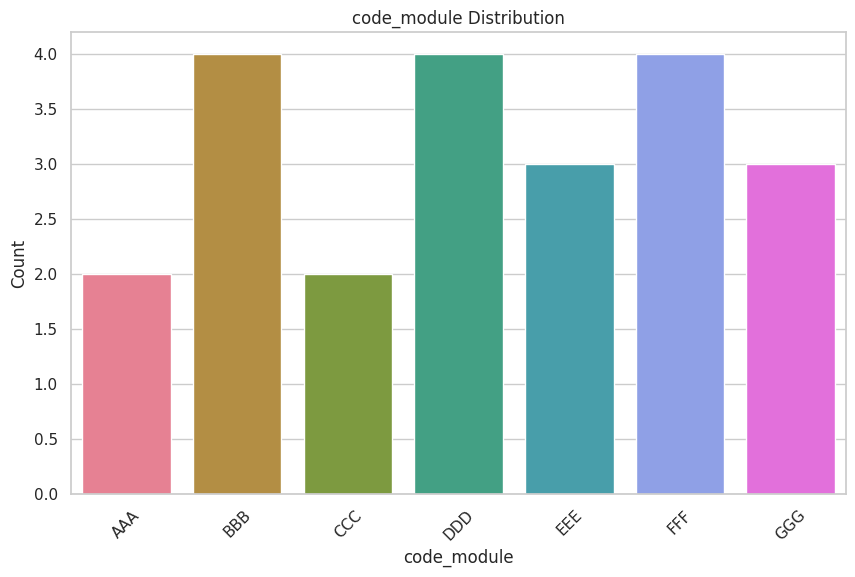

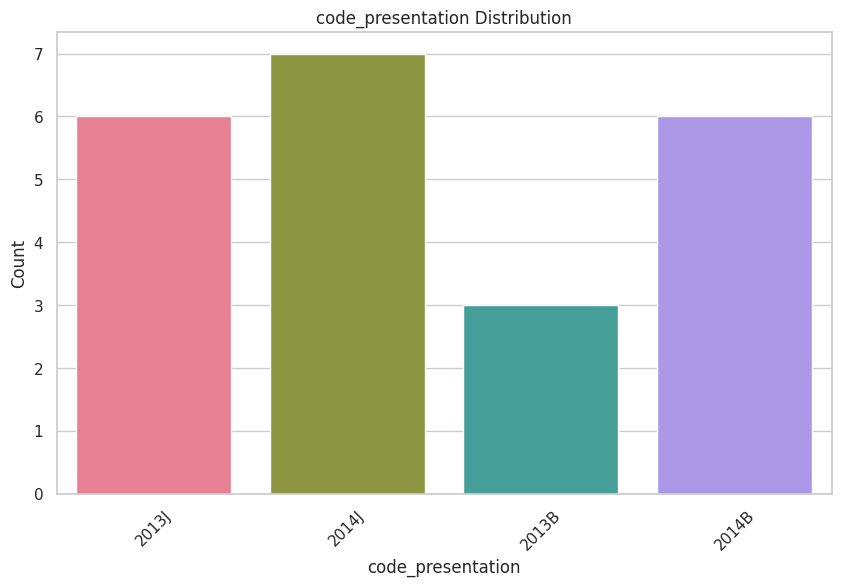

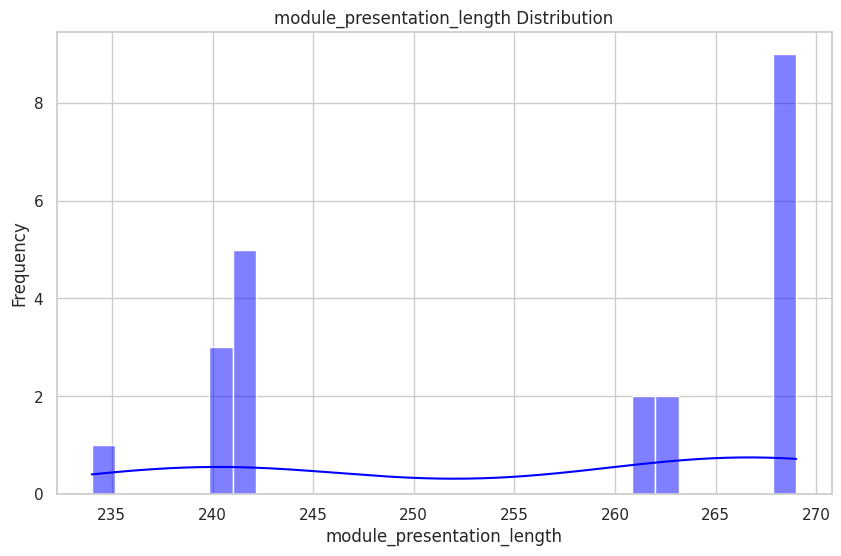

Table: Assessments



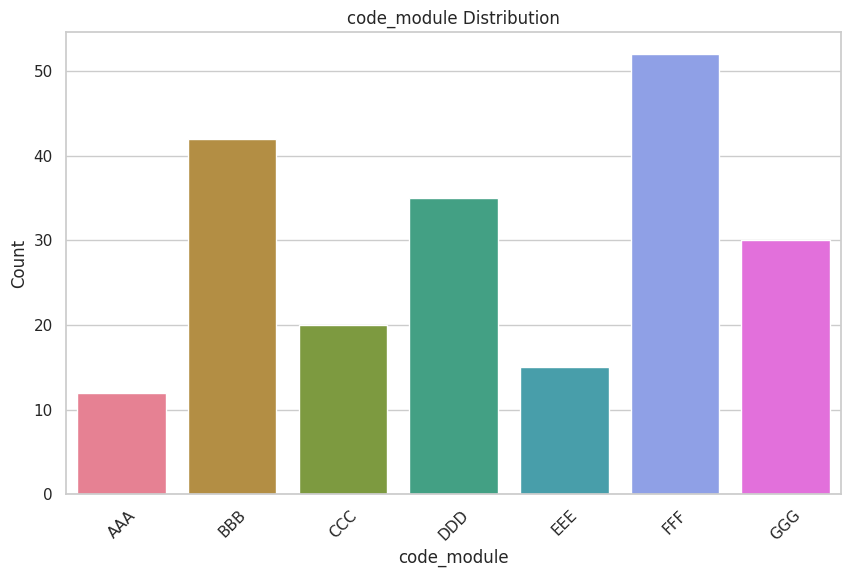

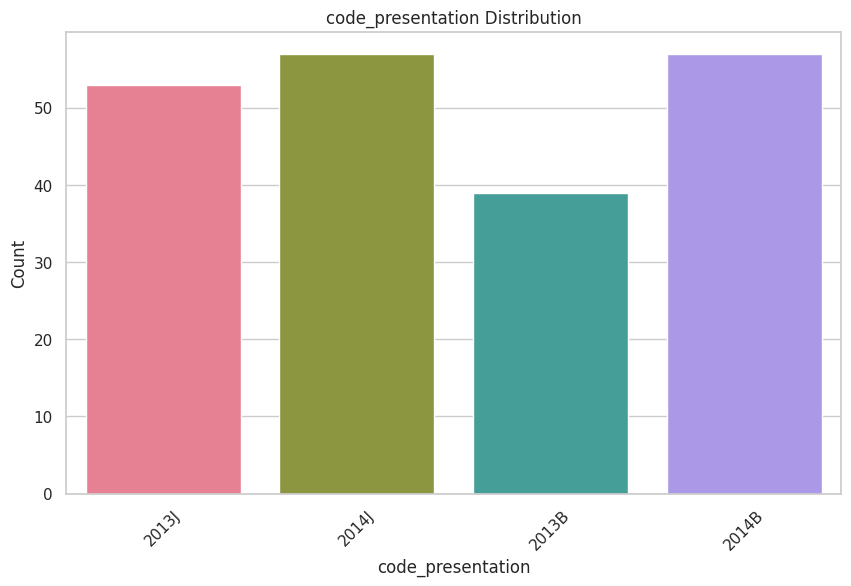

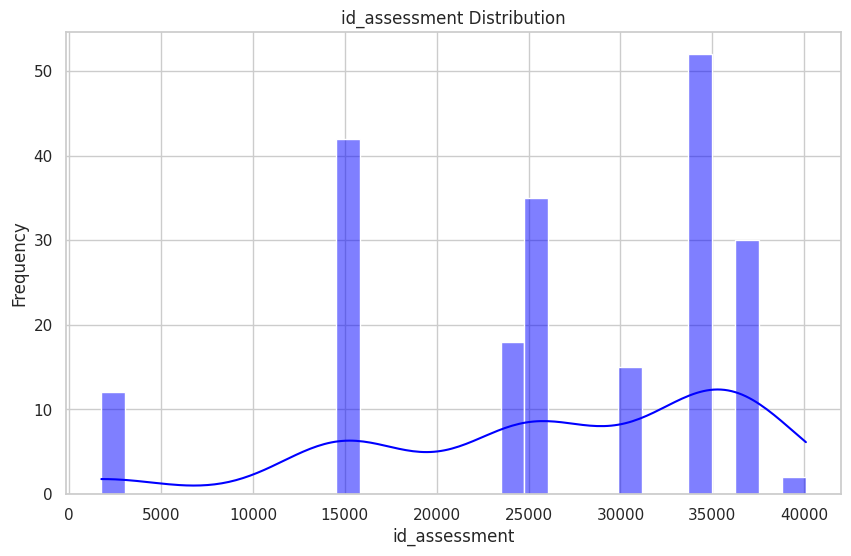

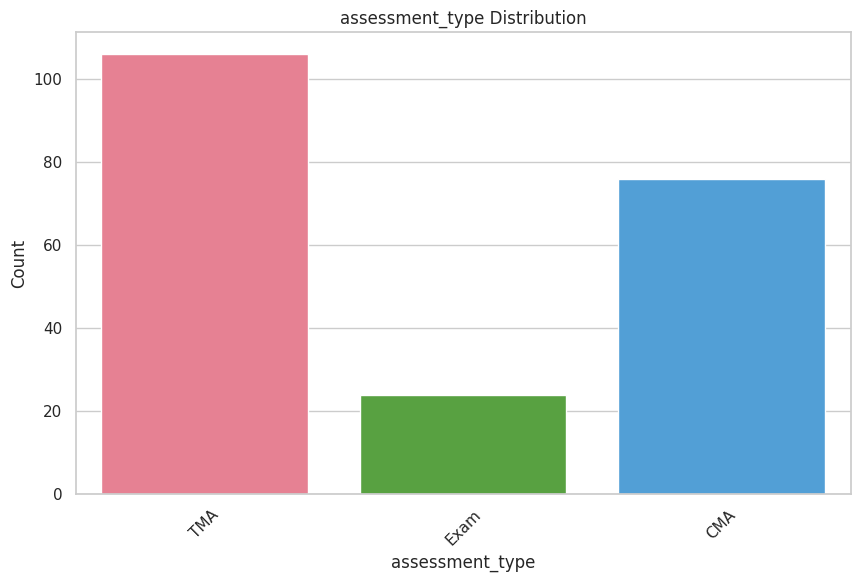

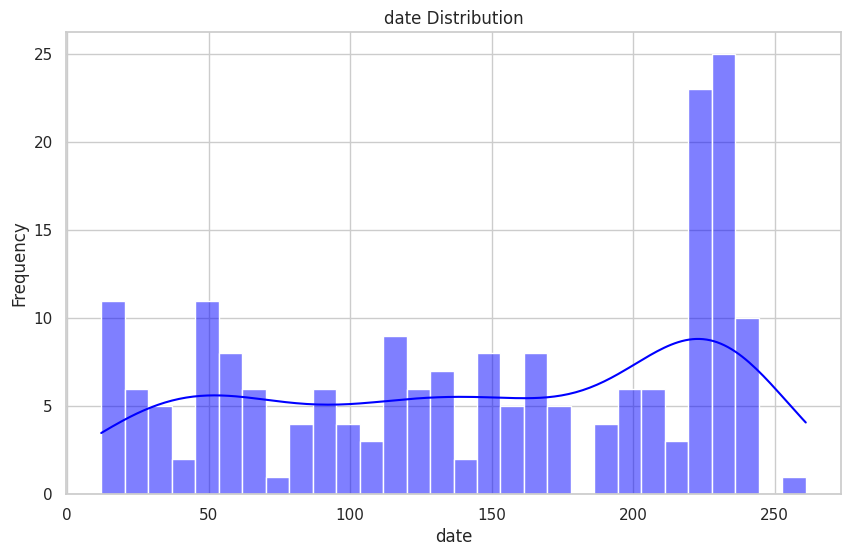

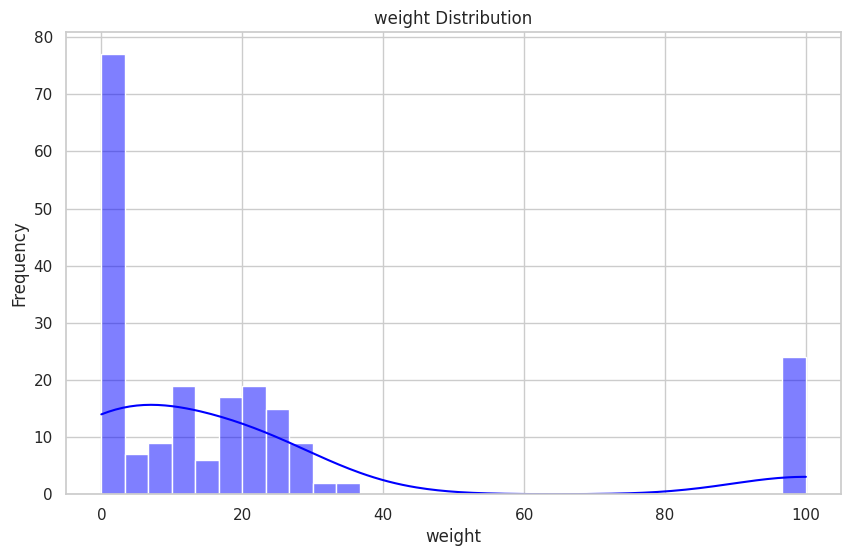

Table: Vle



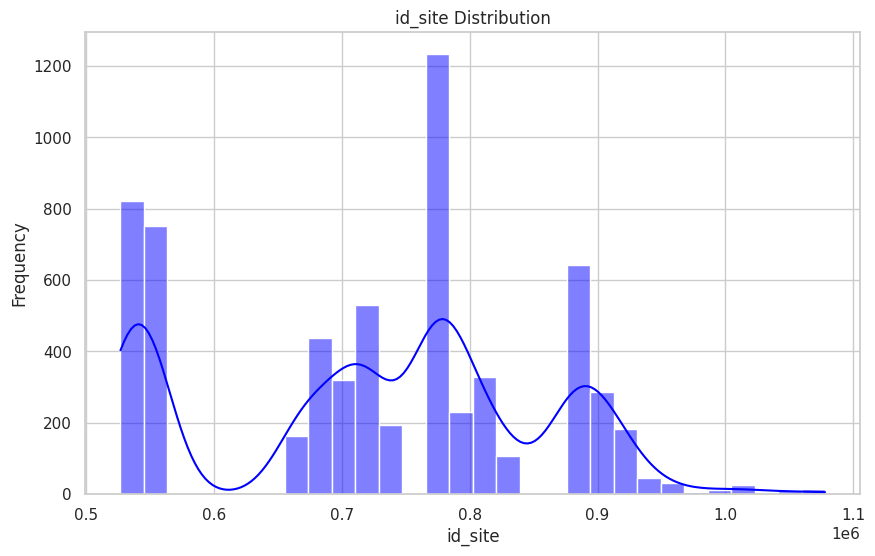

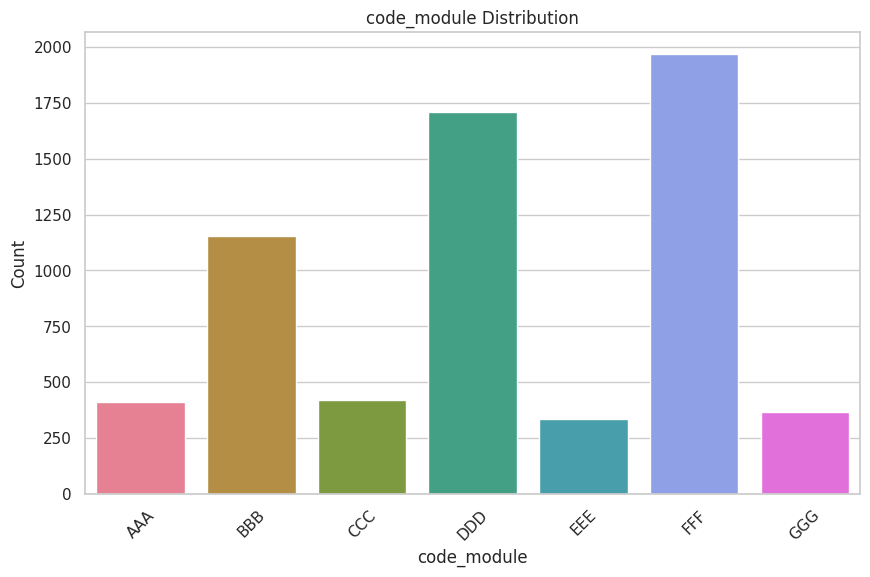

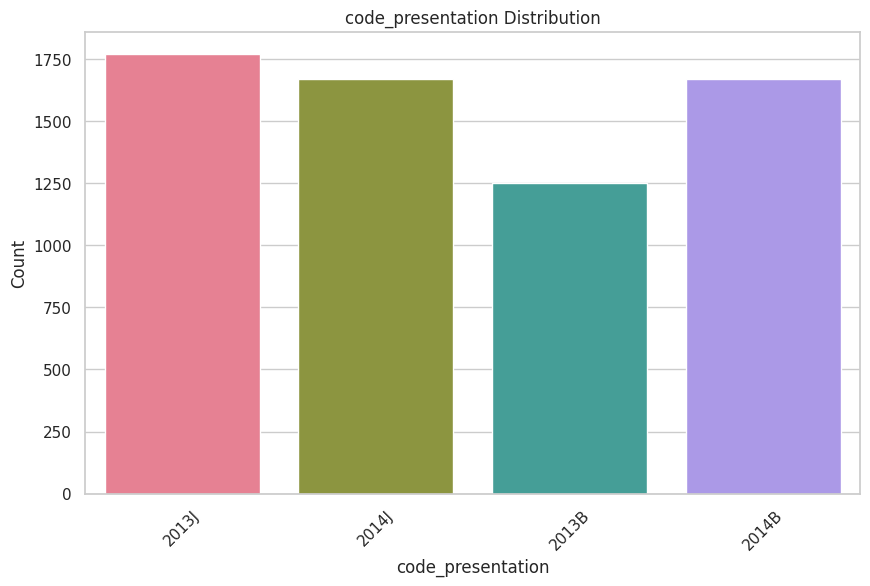

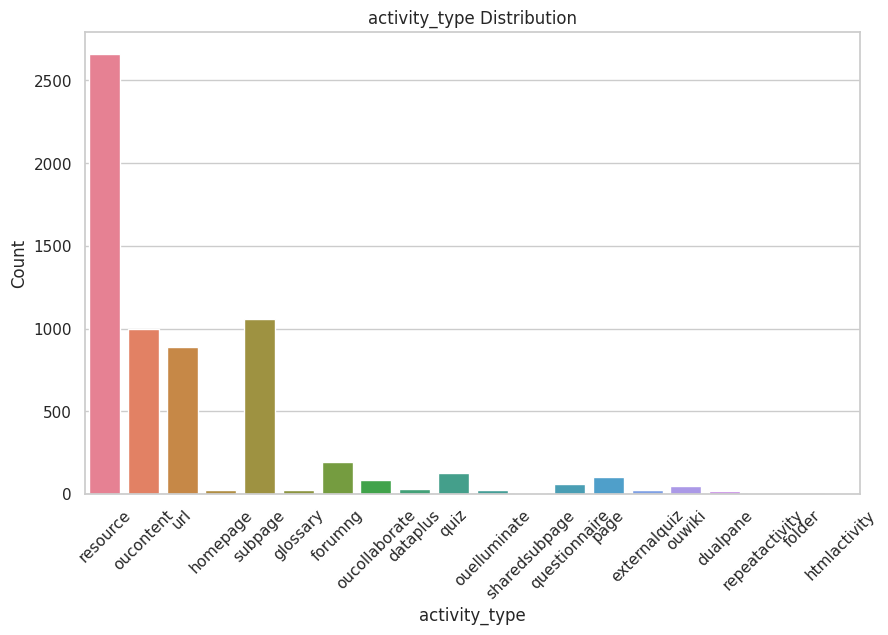

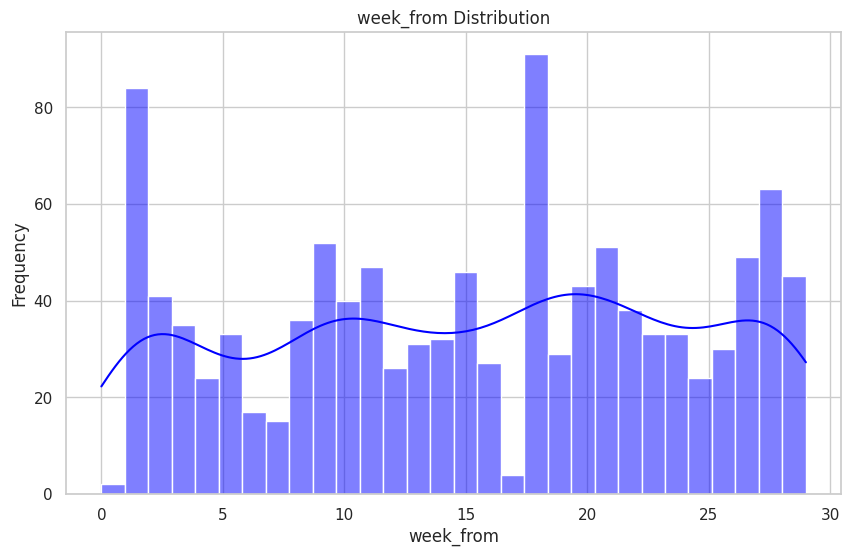

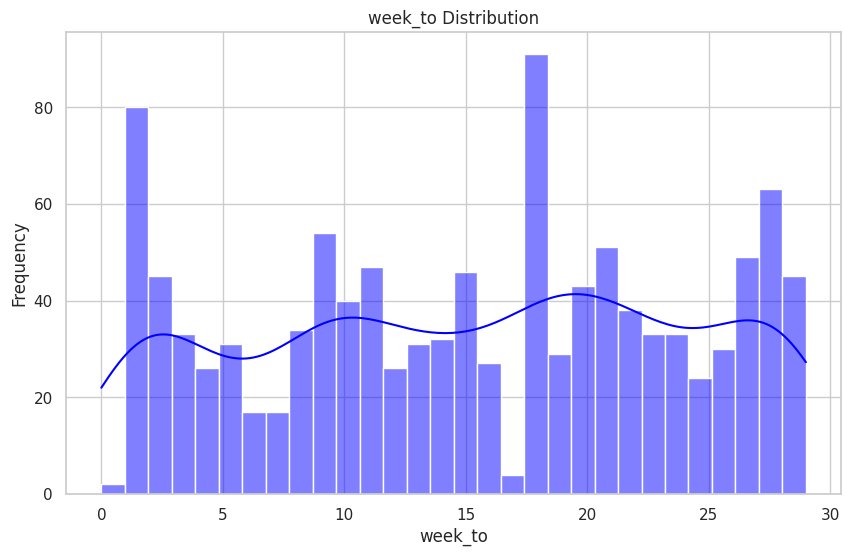

Table: StudentInfo



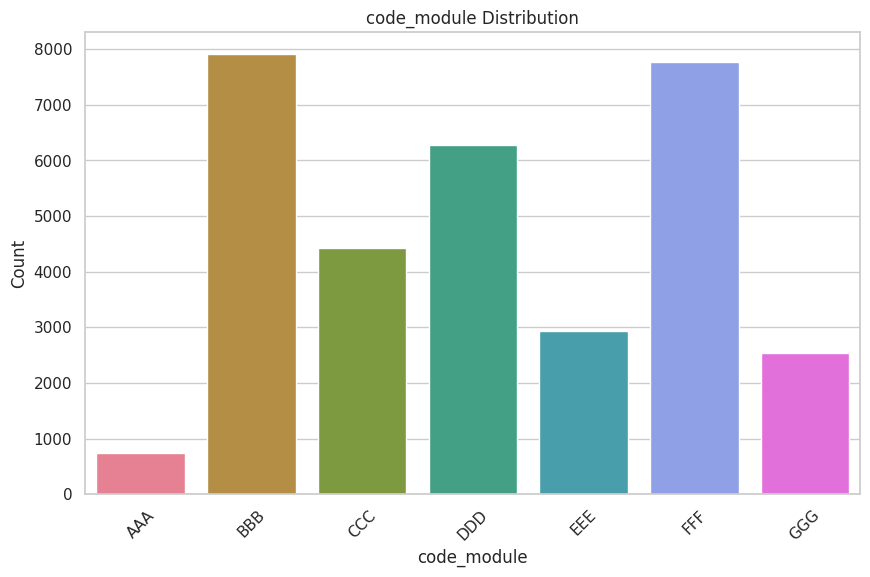

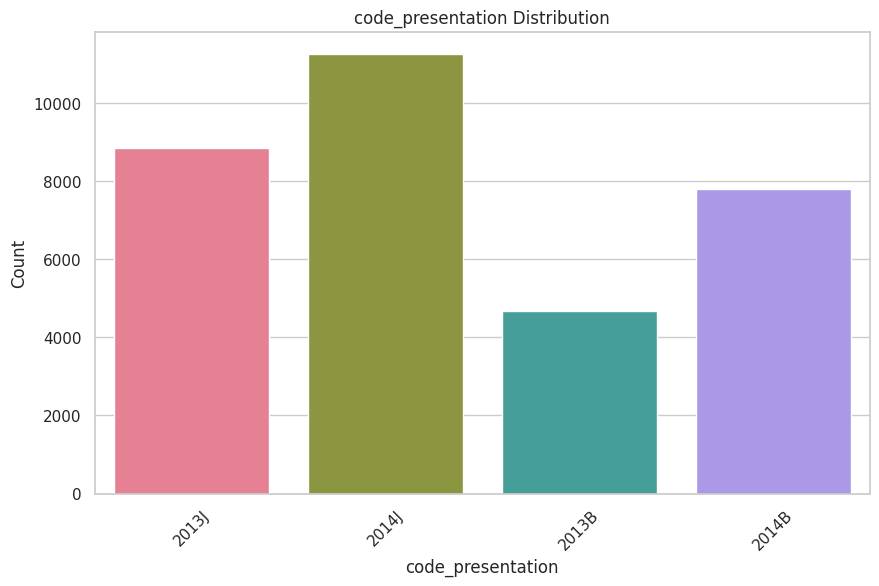

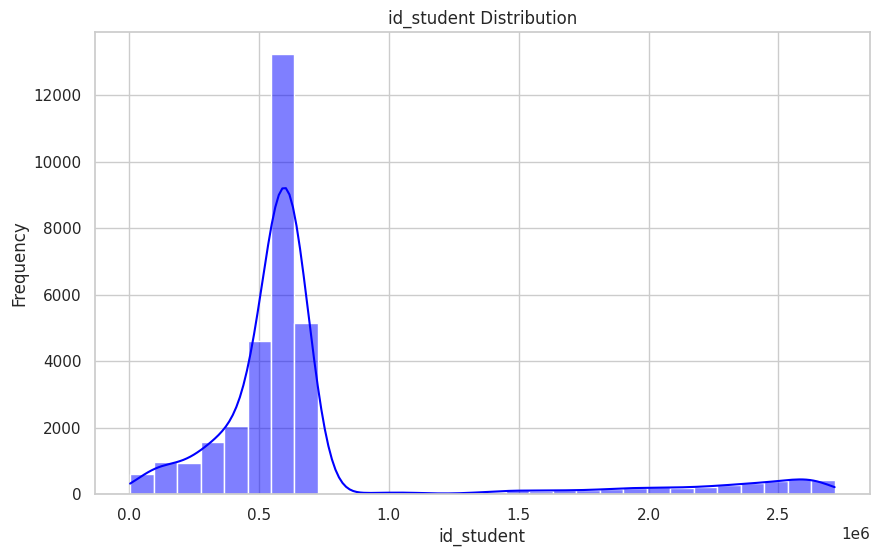

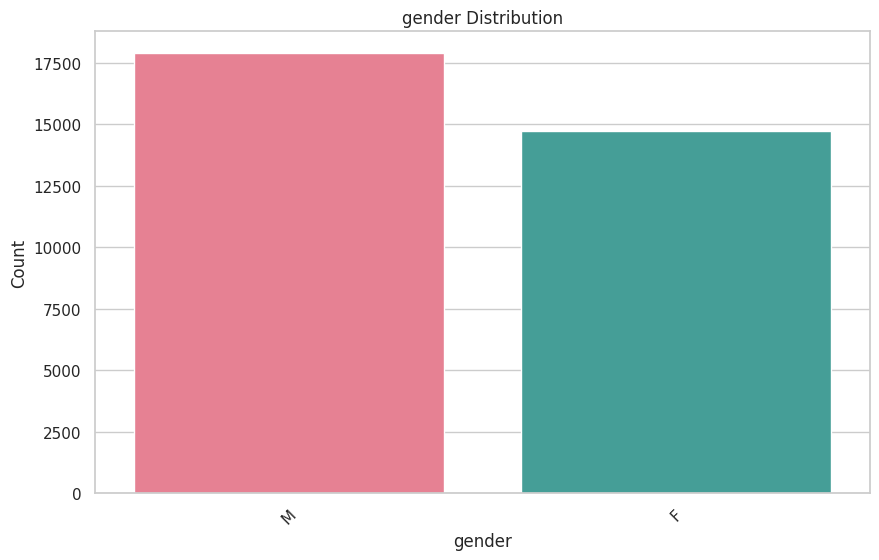

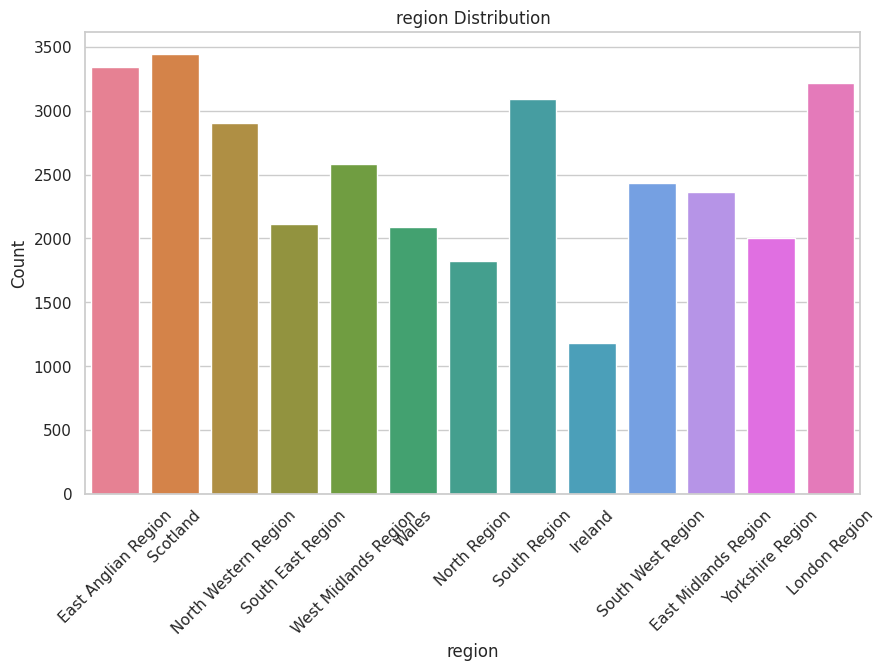

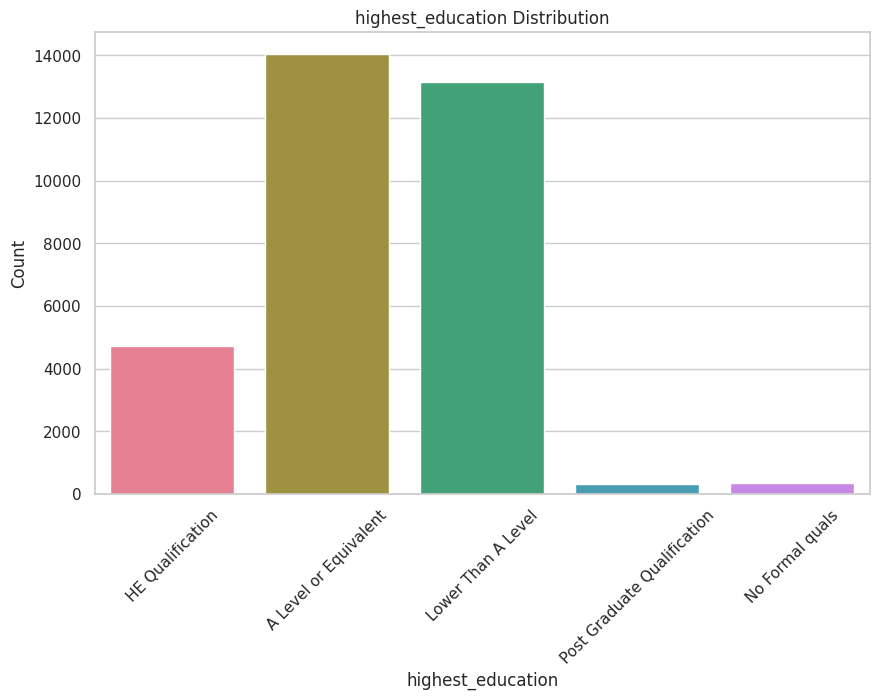

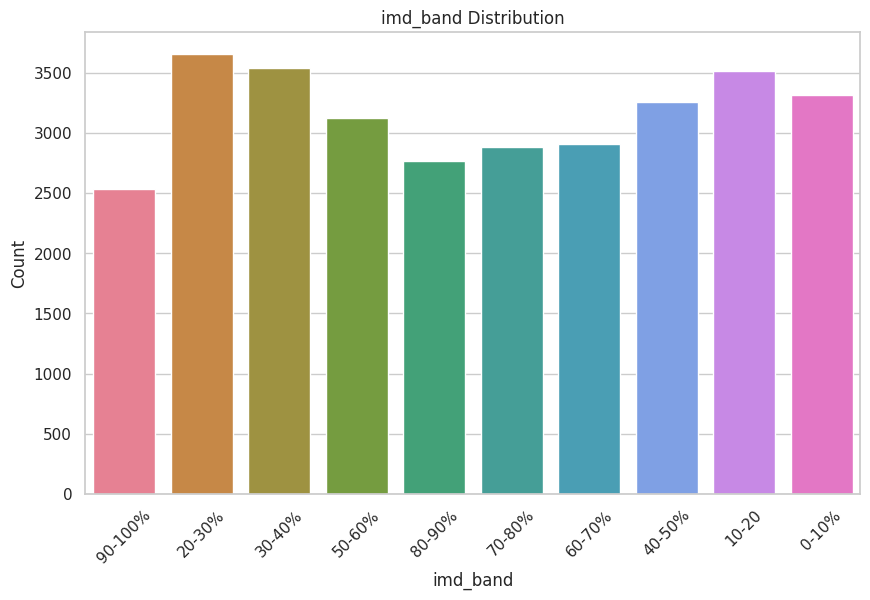

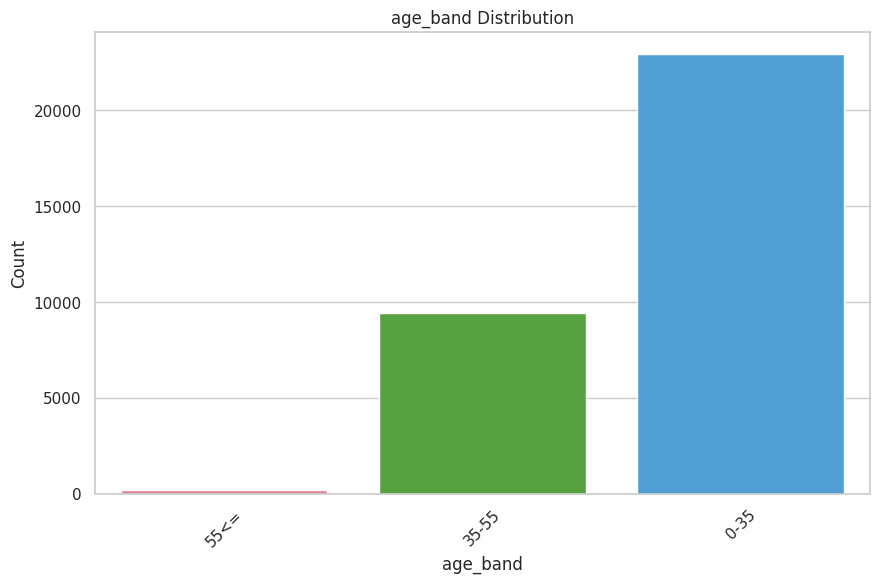

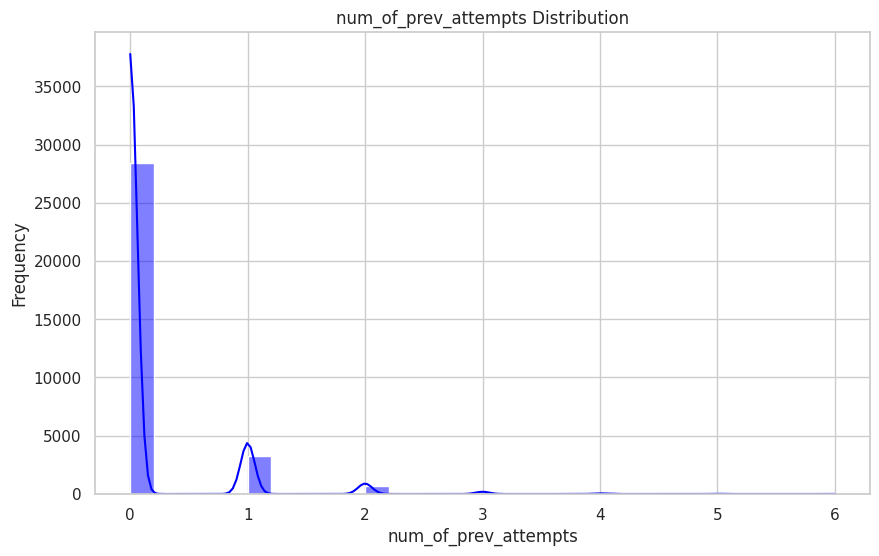

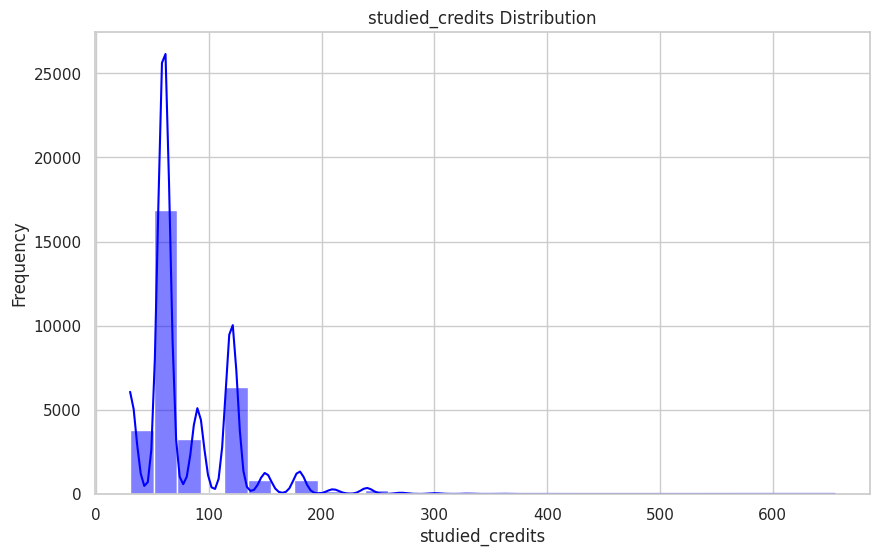

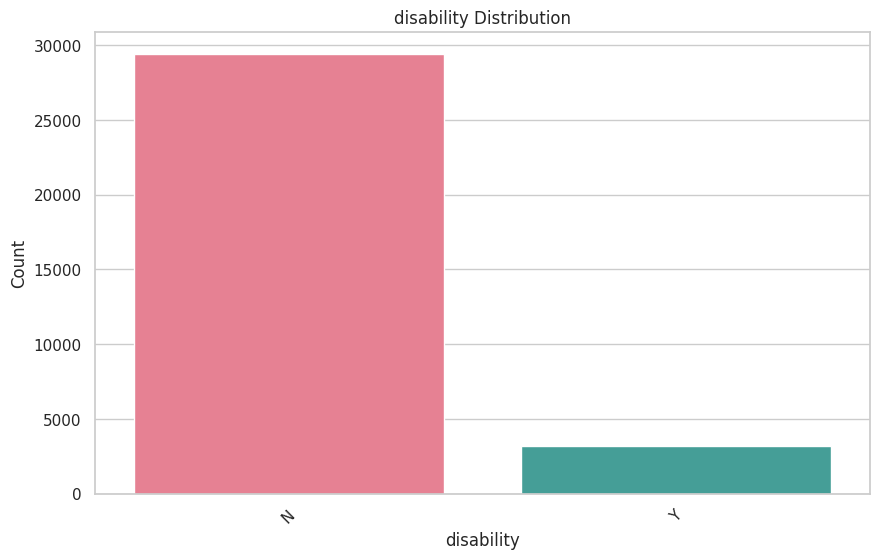

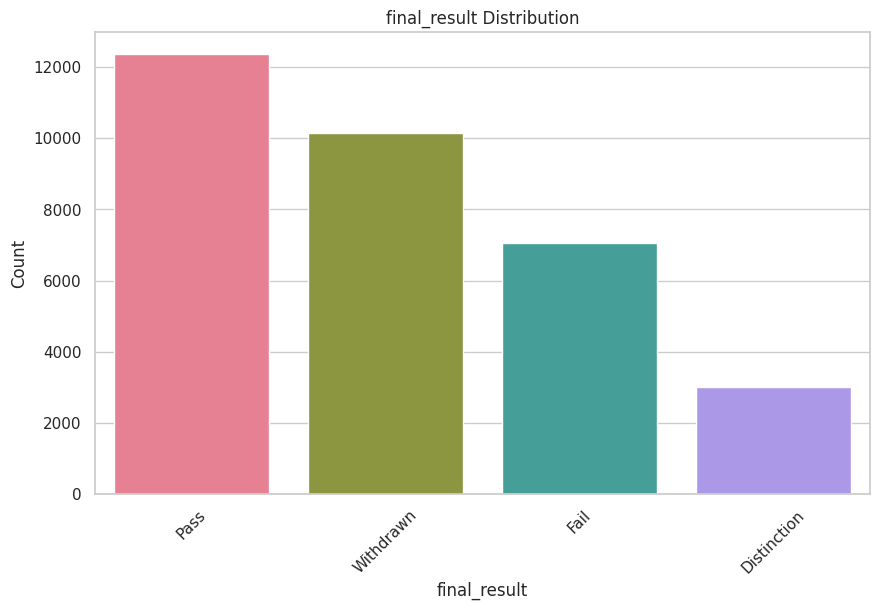

Table: StudentAssessment



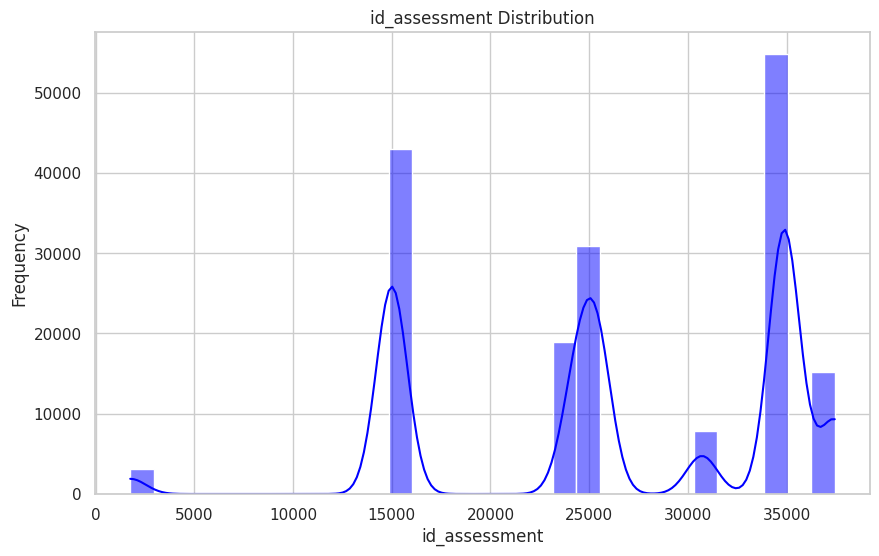

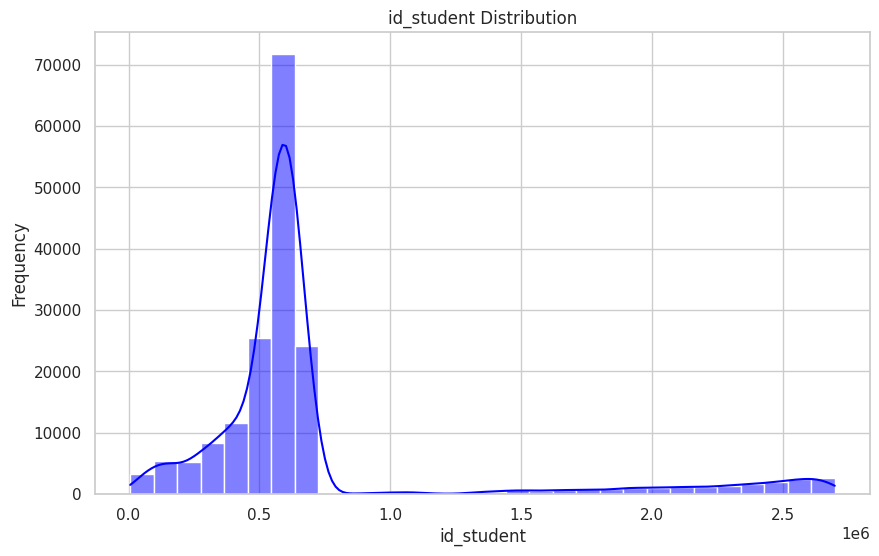

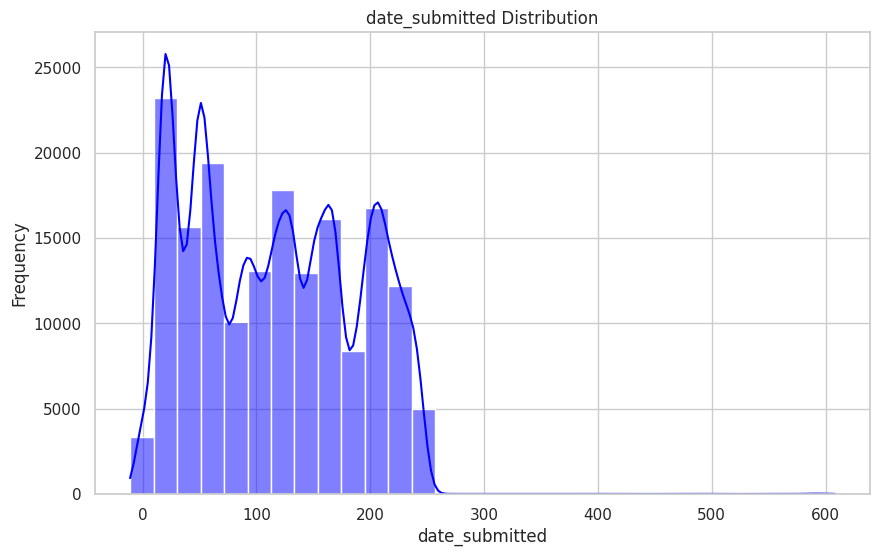

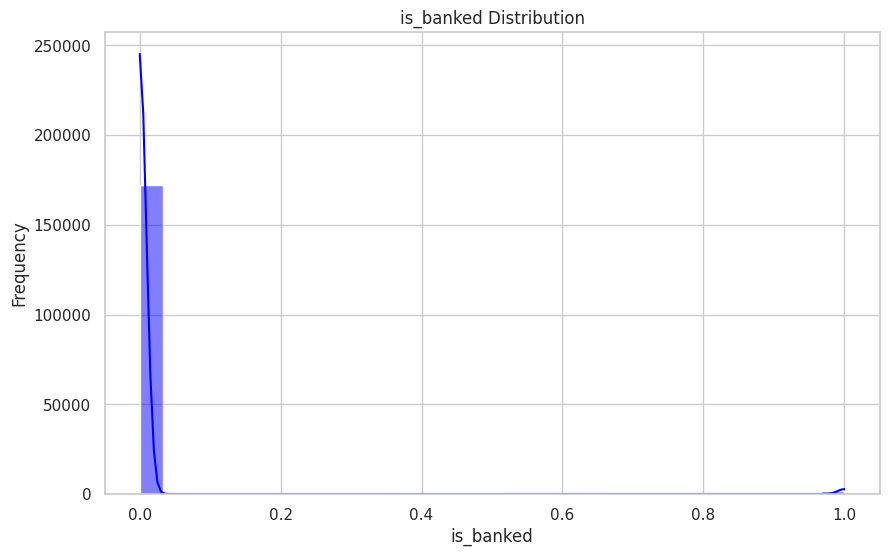

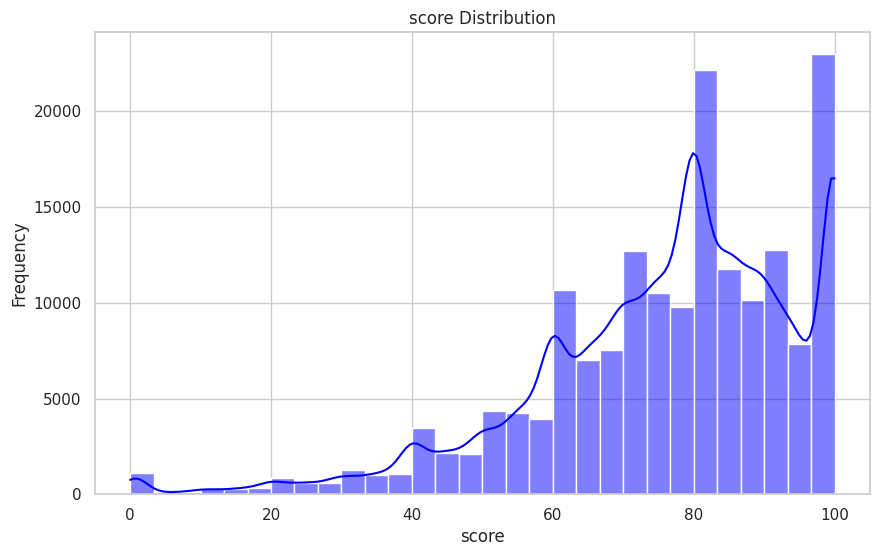

Table: StudentRegistration



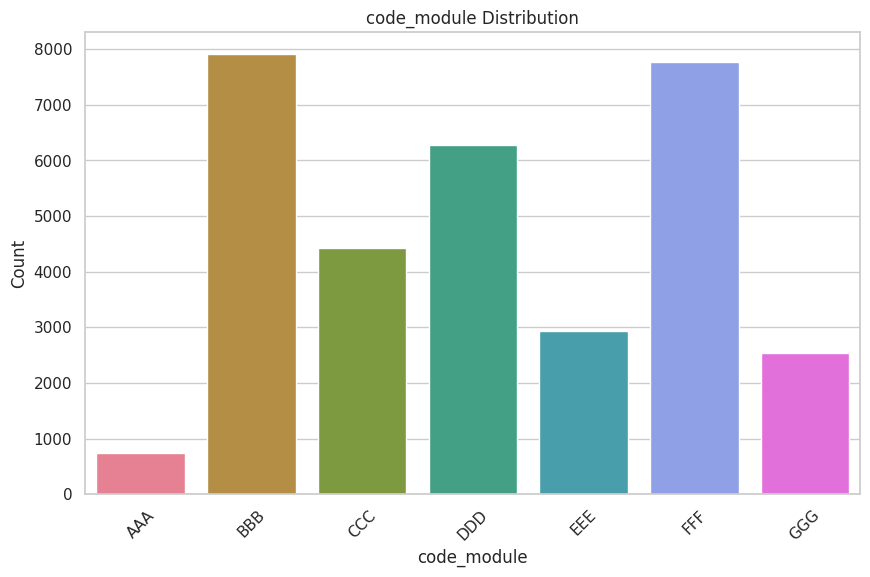

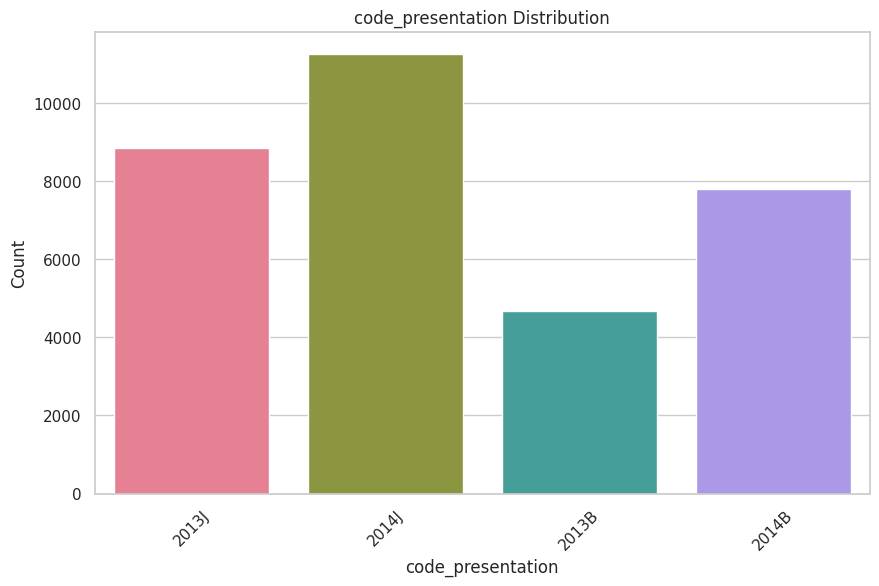

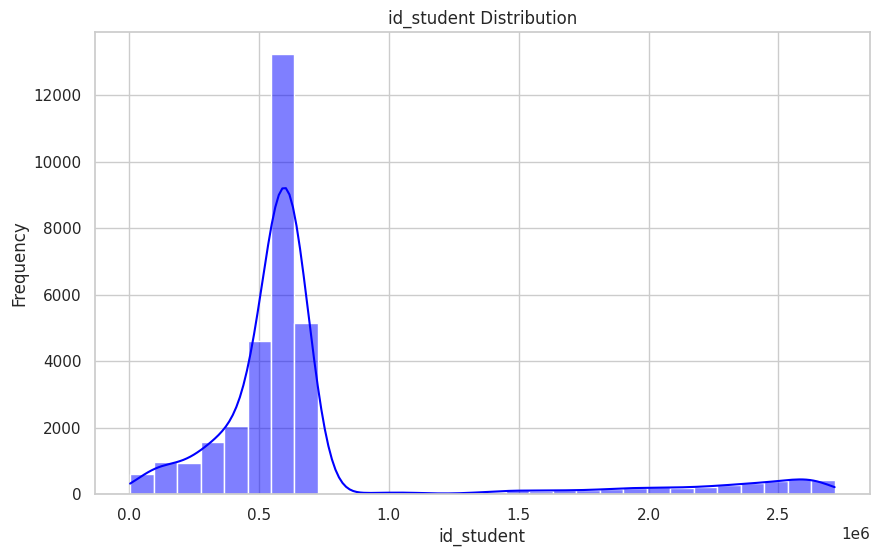

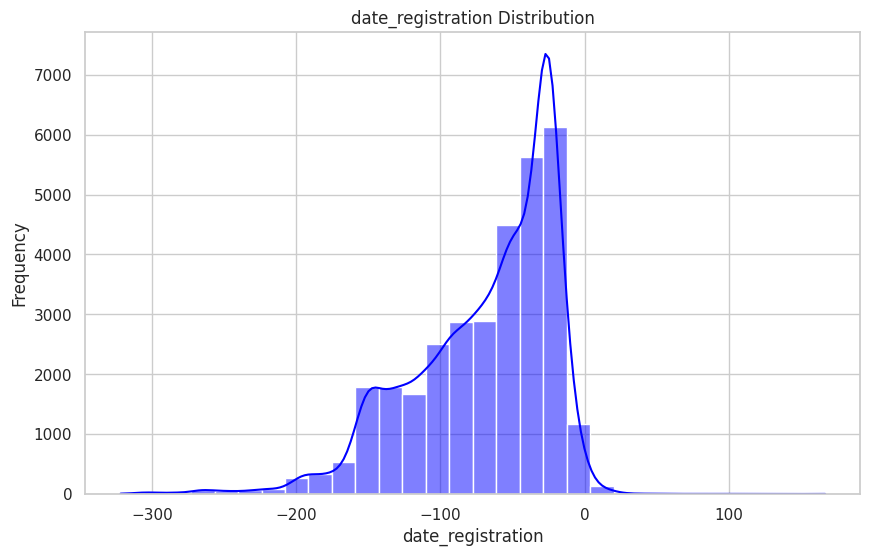

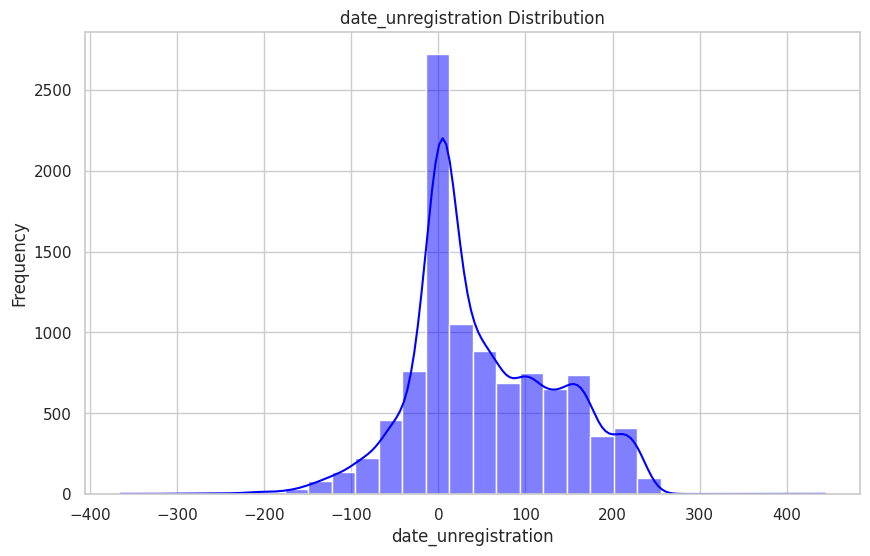

Table: StudentVle



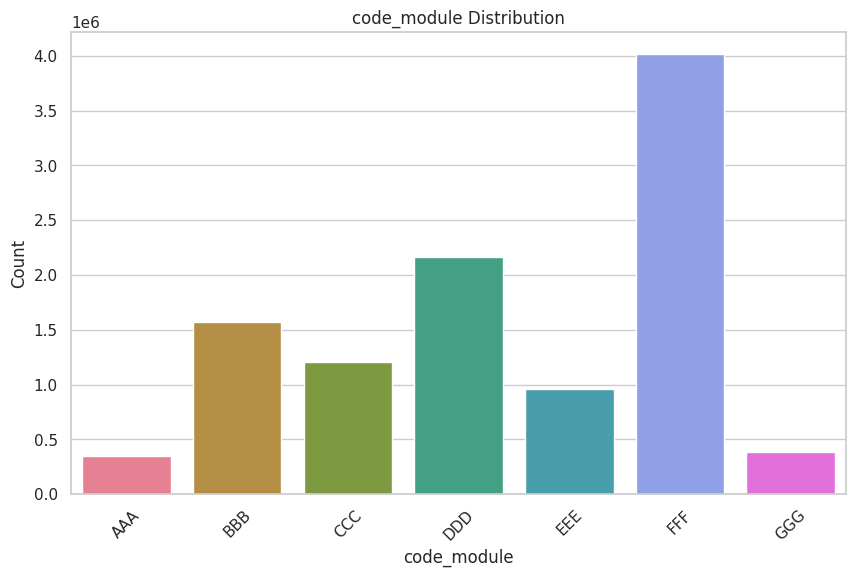

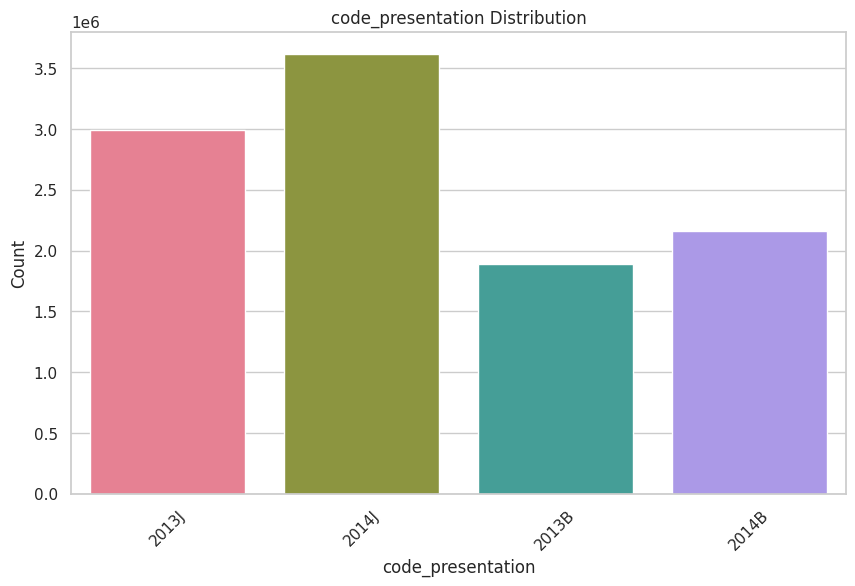

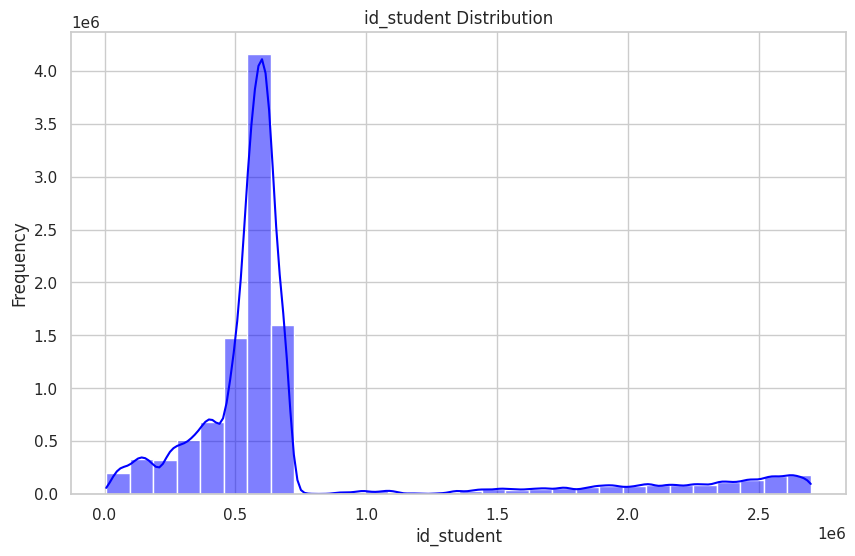

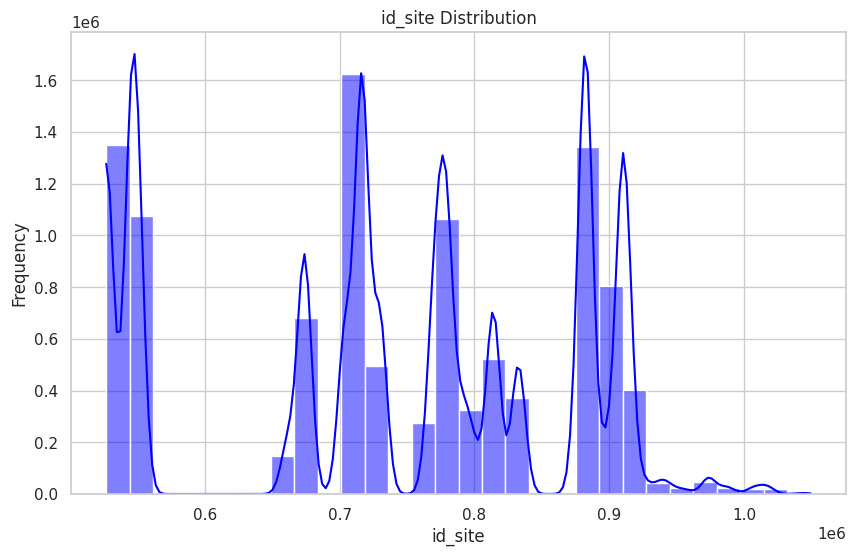

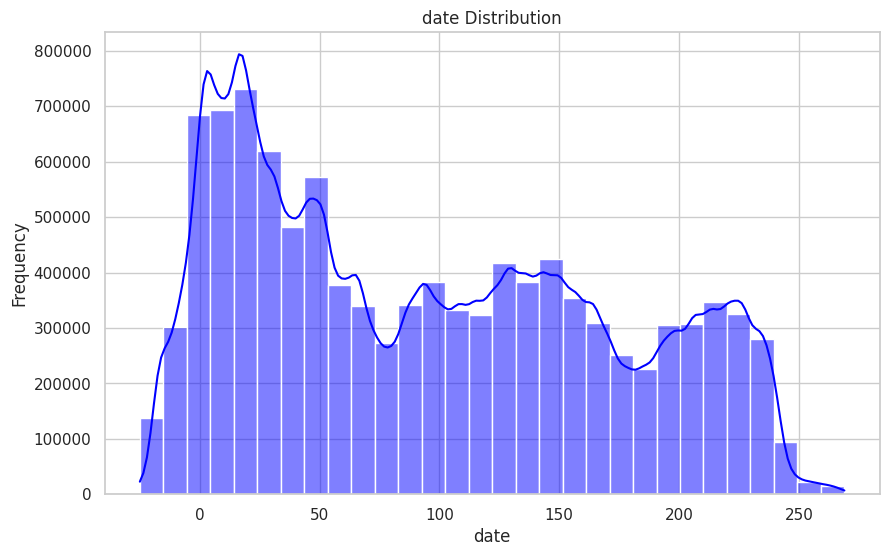

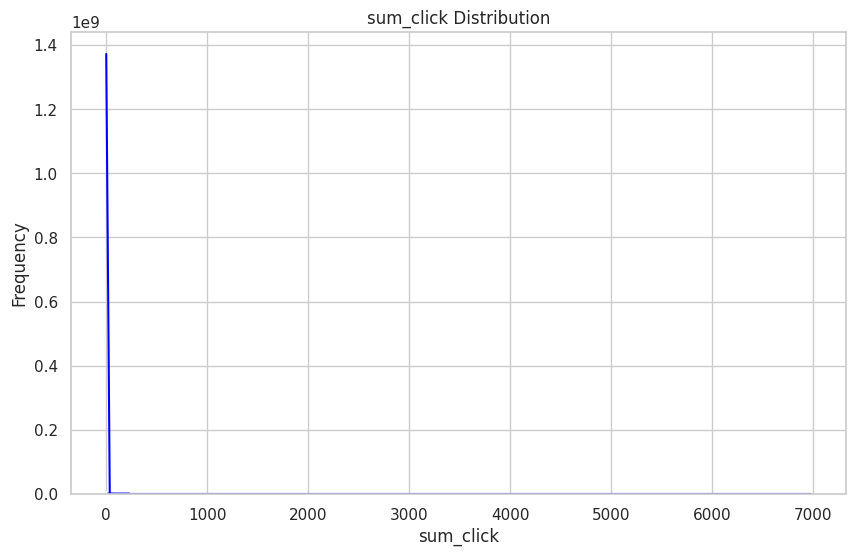

In [ ]:
# For each data table separtly
for table_name,data in University_Learning_Analytics_datasetData.items():
  print(f"Table: {table_name}")
  print()
  DistributionPlot(data)

 2. Exploring grouping/aggregating features with each other by intuitive correlation

### **4. `studentInfo.csv`: Demographics and Final Results**
- **Goals**: Explore student demographics, past attempts, disabilities, and final results.
- **Plots and Analyses**:
  - **Final Result Distribution**: A count plot for `final_result` to see success rates across modules.
  - **Demographic Breakdown**: Count plots for `gender`, `age_band`, `highest_education`, and `region` to understand the student body composition.
  - **IMD Band and Disability Analysis**: Investigate if there’s a correlation between `imd_band` (socioeconomic status) or `disability` and `final_result`.
  - **Previous Attempts and Success Rate**: A bar plot to examine if `num_of_prev_attempts` impacts the likelihood of passing, failing, or withdrawing from a course.

In [2]:
StudentInfo = pd.read_csv('StudentInfo_cleaned.csv')

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def PlotFeaturesVSFinalResult(data, save_plots=False, output_dir='./plots', target_column=None):
    """
    Automatically plots all categorical and numeric features against a target column grouped by categories.

    Args:
    - data: pandas DataFrame containing the dataset.
    - save_plots: Boolean, if True saves the plots as images.
    - output_dir: Directory to save plots if save_plots=True.
    - target_column: Optional, specify the target column directly.
    """
    # Ensure output directory exists
    if save_plots:
        os.makedirs(output_dir, exist_ok=True)

    # Detect categorical and numeric features
    categorical_features = [col for col in data.columns if data[col].dtype == 'object' and col != target_column]
    numeric_features = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col != target_column]

    # Copy data to avoid modifying the original DataFrame
    data_copy = data.copy()

    # Group final result into 'Not Withdrawn' and 'Withdrawn'
    grouped_names = {'Not Withdrawn': 'Not Withdrawn', 'Withdrawn': 'Withdrawn'}
    data_copy['final_result_grouped'] = data_copy[target_column].replace({
        'Pass': grouped_names['Not Withdrawn'],
        'Fail': grouped_names['Not Withdrawn'],
        'Distinction': grouped_names['Not Withdrawn'],
        'Withdrawn': grouped_names['Withdrawn']
    })

    # Plot categorical features
    for feature in categorical_features:
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=data_copy, x=feature, hue='final_result_grouped', palette='pastel', order=data_copy[feature].value_counts().index)

        # Annotate bars with count numbers
        for p in ax.patches:
            if p.get_height() > 0:  # Skip bars with zero height
                count = int(p.get_height())
                ax.annotate(count, (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                            textcoords='offset points')

        # Set titles and labels
        plt.title(f'{feature} Distribution by Final Result', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title='Final Result Grouped', loc='upper right')
        plt.tight_layout()

        # Save the plot if requested
        if save_plots:
            plt.savefig(f'{output_dir}/{feature}_vs_final_result.png', dpi=300)

        plt.show()

    # Plot numeric features
    for feature in numeric_features:
        plt.figure(figsize=(10, 6))
        ax = sns.boxplot(data=data_copy, x='final_result_grouped', y=feature, palette='pastel')

        # Set titles and labels
        plt.title(f'{feature} Distribution by Final Result Group', fontsize=14)
        plt.xlabel('Final Result Grouped', fontsize=12)
        plt.ylabel(feature, fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Save the plot if requested
        if save_plots:
            plt.savefig(f'{output_dir}/{feature}_boxplot_vs_final_result.png', dpi=300)

        plt.show()


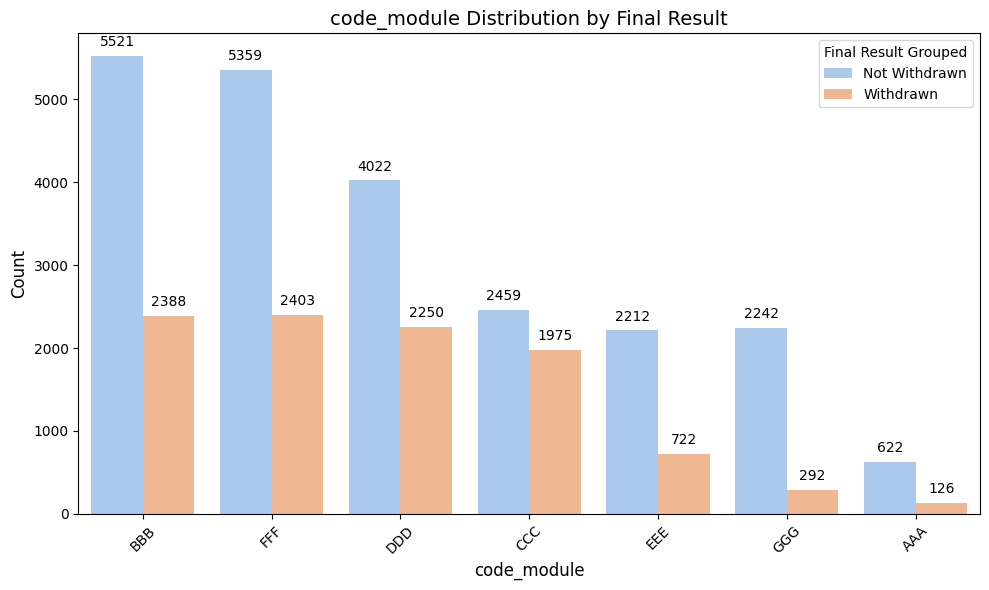

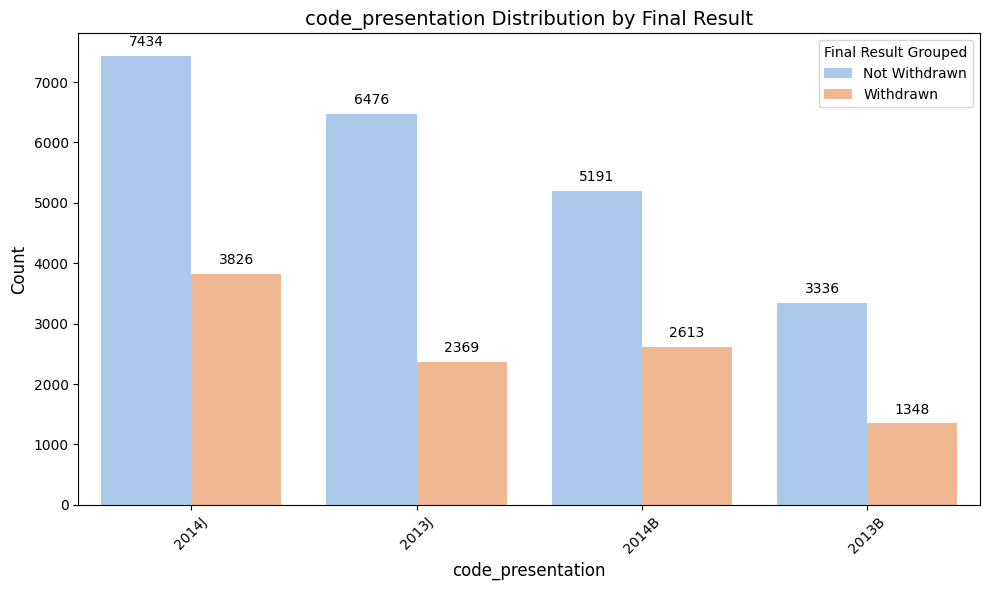

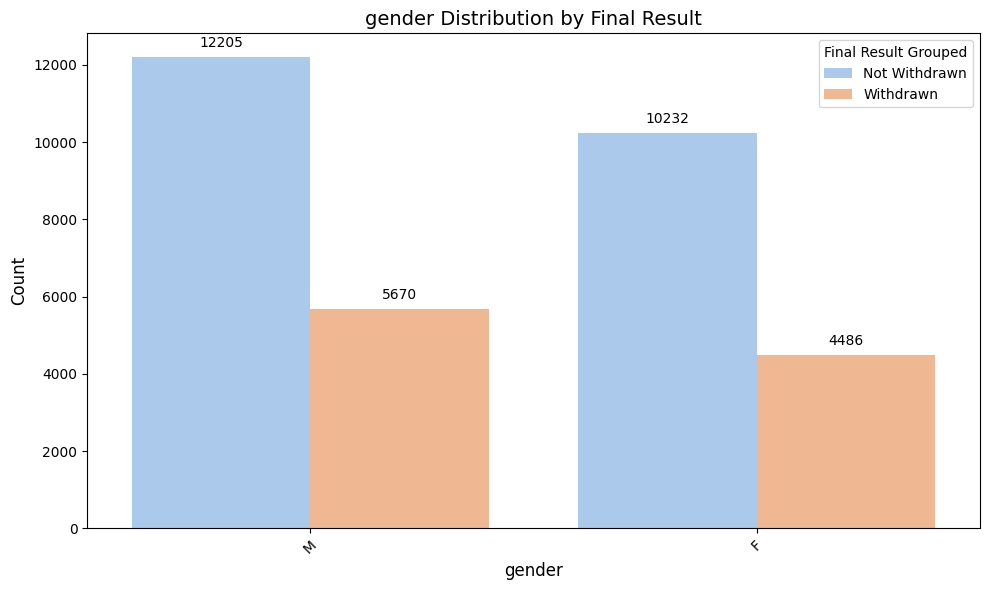

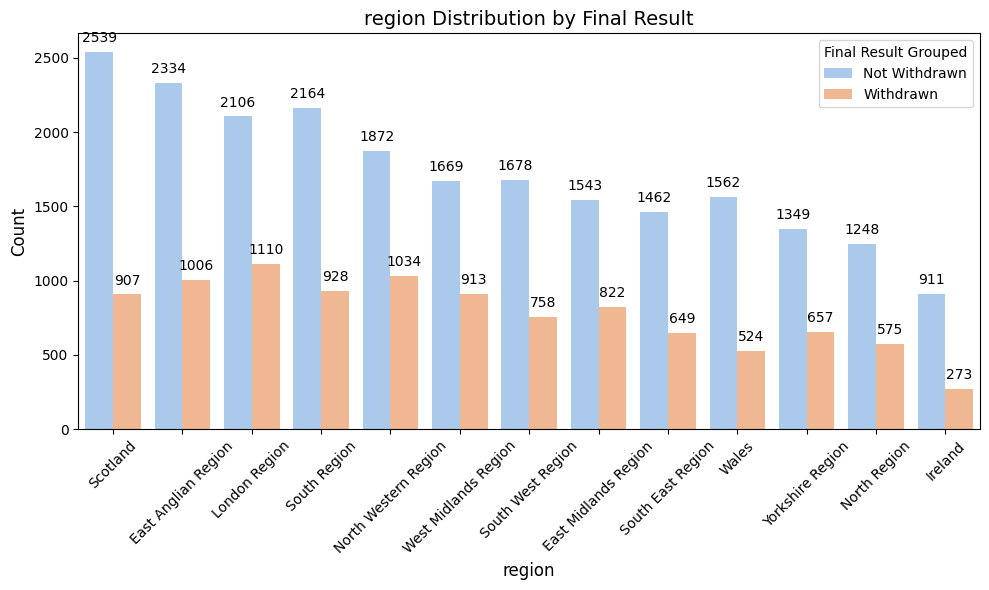

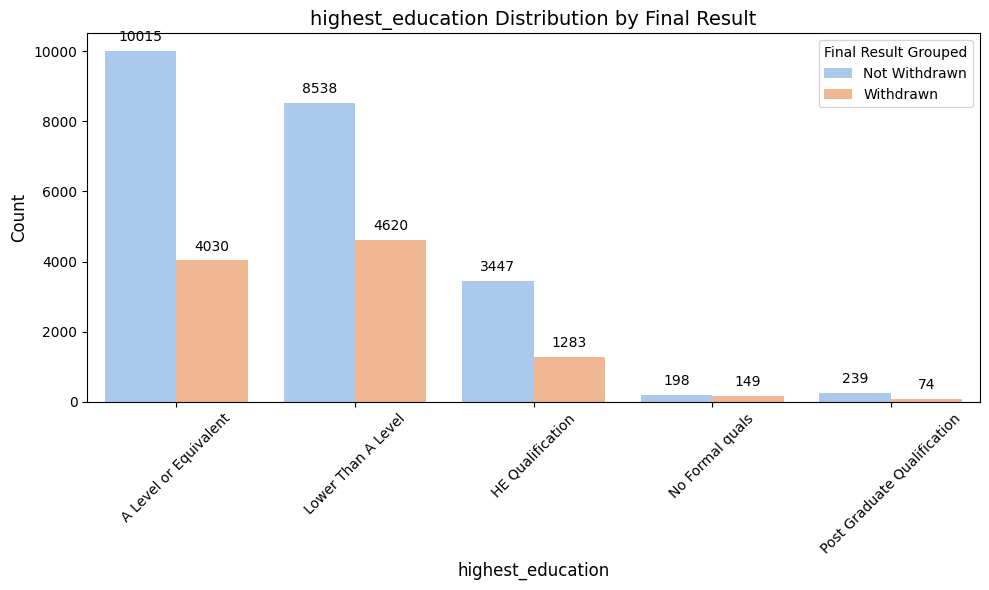

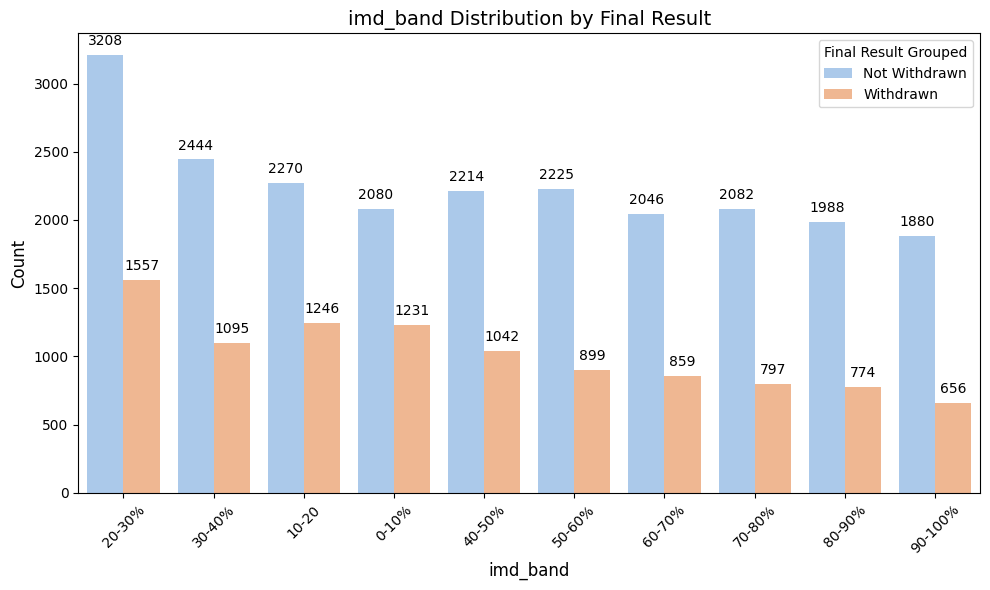

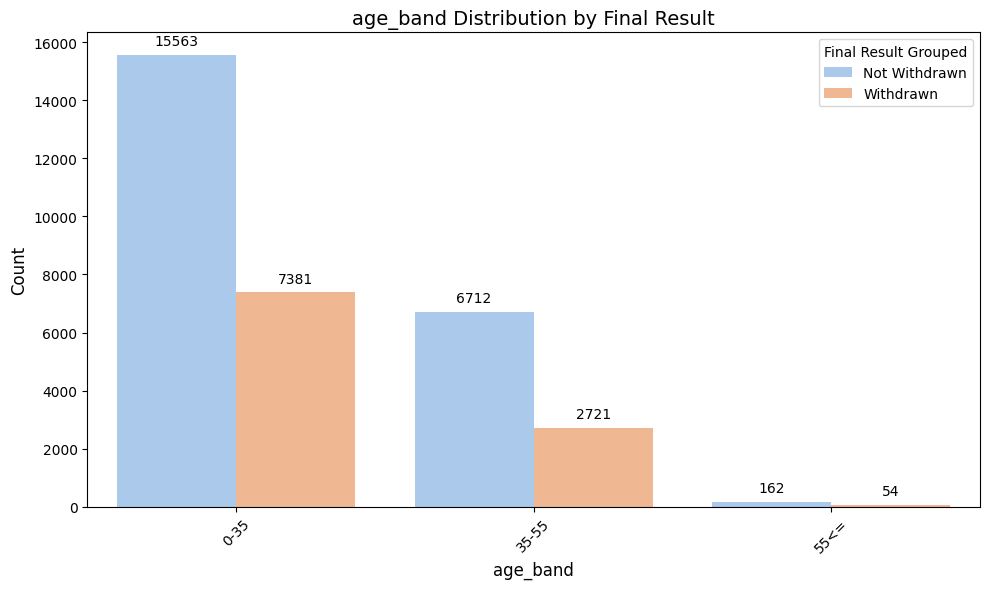

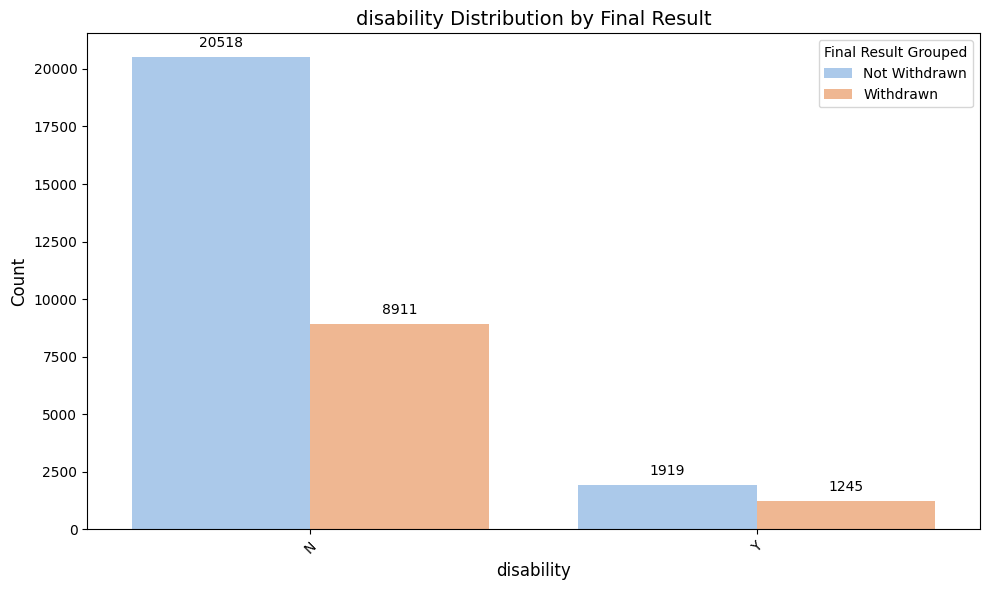

<ipython-input-12-009c65def7bf>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=data_copy, x='final_result_grouped', y=feature, palette='pastel')


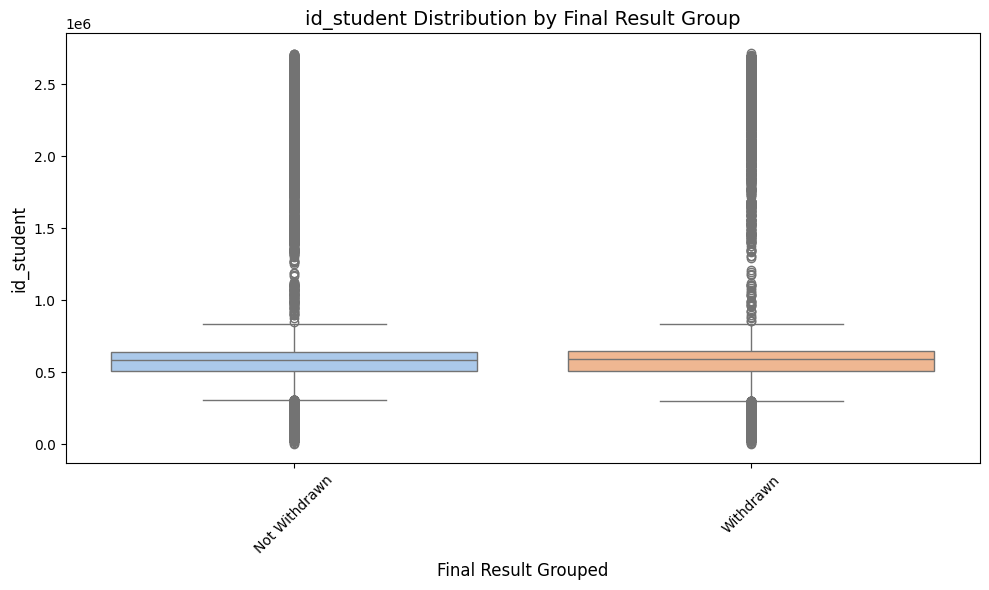

<ipython-input-12-009c65def7bf>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=data_copy, x='final_result_grouped', y=feature, palette='pastel')


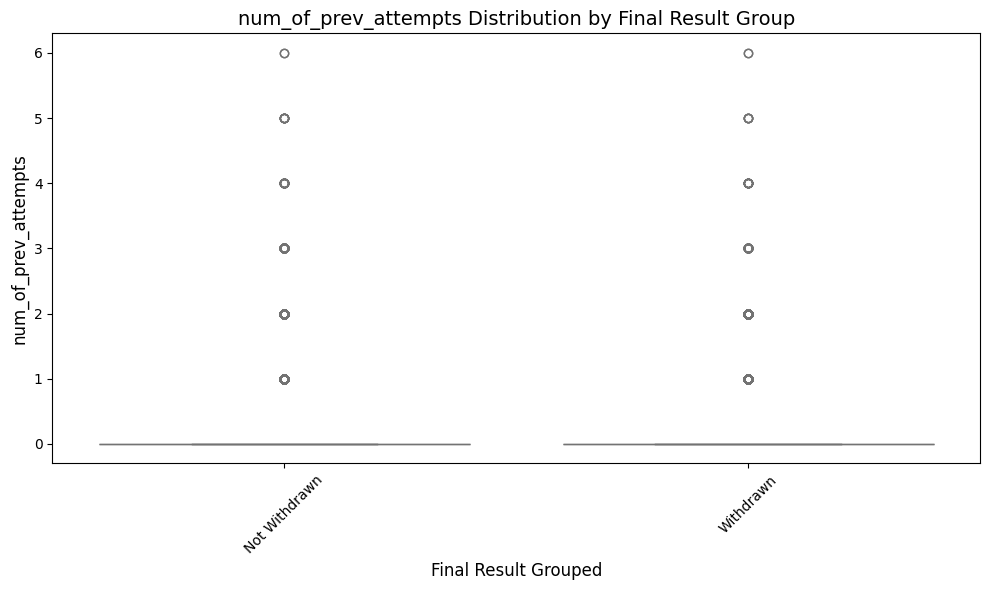

<ipython-input-12-009c65def7bf>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=data_copy, x='final_result_grouped', y=feature, palette='pastel')


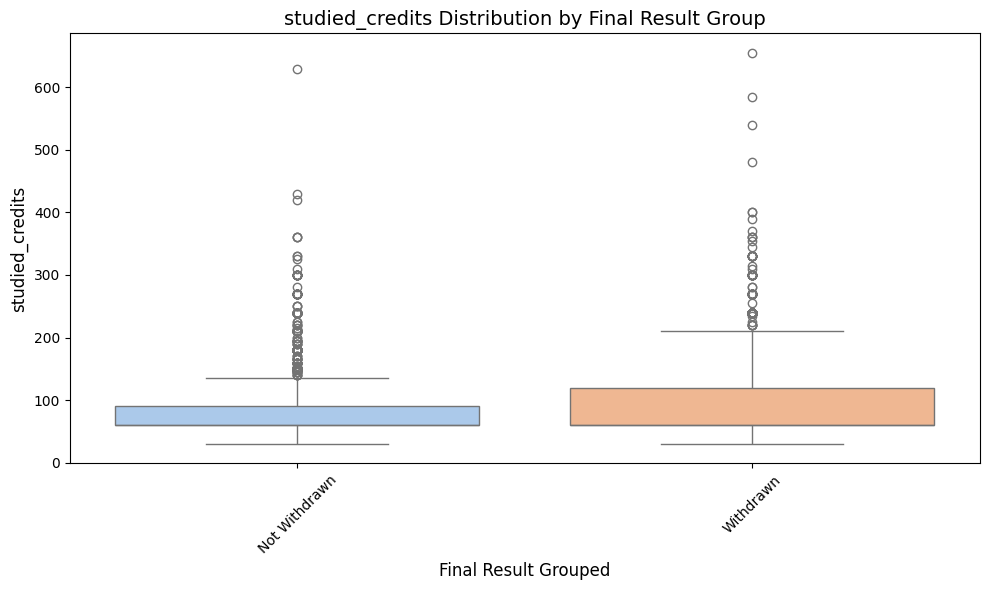

In [13]:
PlotFeaturesVSFinalResult(StudentInfo, save_plots=False, output_dir='./plots', target_column='final_result')

# EDA Level 1 : All Tables

### **OverAll Analysis**
- **Time Series Analysis**: For files with time-based data (like `date`, `date_registration`, `date_unregistration`), a time series analysis could reveal trends over time or seasonal patterns in engagement or dropout rates.

- **Correlation Matrix**: Investigate correlations between numeric variables (e.g., `score`, `sum_click`, `studied_credits`, `imd_band`) to identify any significant relationships that might warrant further exploration.


#### **Module and Presentation Impact on Assessments**
   - **Goal**: Understand how module-specific factors (like duration) influence assessment patterns and student performance.
   - **Process**:
     - Join `courses` with `assessments` on `code_module` and `code_presentation`.
     - Analyze the relationship between `length` and assessment timing or weights. For example:
       - **Assessment Timing vs. Length**: Use a scatter plot of `length` against the assessment `date` to see if longer modules distribute assessments more evenly.
       - **Assessment Weight by Module**: Group by `code_module` and aggregate the `weight` to check if some modules place more emphasis on specific assessments.

#### **Impact of Student Demographics on VLE Engagement**
   - **Goal**: Determine if demographics (e.g., age, education level, region) affect online engagement patterns.
   - **Process**:
     - Join `studentInfo` with `studentVle` on `id_student`, `code_module`, and `code_presentation`.
     - Analyze engagement (`sum_click`) across demographic features:
       - **Clicks by Age Band**: Box plot of `sum_click` grouped by `age_band` to see if engagement differs by age.
       - **Clicks by Highest Education**: Box plot or bar plot to determine if education level affects interaction frequency.

#### **Relationship Between Assessment Scores and Final Results**
   - **Goal**: Investigate if assessment scores across different types affect final student outcomes.
   - **Process**:
     - Join `studentAssessment` with `studentInfo` on `id_student`, `code_module`, and `code_presentation`.
     - Analyze the correlation between `score` and `final_result`:
       - **Score by Final Result**: Violin or box plot to see if students who achieve `Pass` or `Distinction` consistently have higher scores in assessments.
       - **Assessment Type Impact**: Separate by `assessment_type` to check if certain assessments (e.g., TMAs, Exams) are more predictive of final results.

#### **Impact of Registration Patterns on Success**
   - **Goal**: Determine if the timing of student registration/unregistration affects their final outcomes.
   - **Process**:
     - Join `studentRegistration` with `studentInfo` on `id_student`, `code_module`, and `code_presentation`.
     - Analyze features like `date_registration` and `date_unregistration` against `final_result`:
       - **Registration Timing and Success**: Plot `date_registration` against `final_result` to check if early registrants tend to pass more often.
       - **Unregistration Analysis**: Plot `date_unregistration` for students who withdrew, looking for patterns in timing and demographics.

#### **Assessment Type and Interaction with VLE Materials**
   - **Goal**: Examine if the type or weight of assessments is related to student engagement with VLE materials.
   - **Process**:
     - Join `assessments`, `studentVle`, and `studentAssessment` on `code_module`, `code_presentation`, and `id_student`.
     - Check if assessment types with higher weight drive more interactions:
       - **Assessment Date vs. Interaction Frequency**: Line plot showing VLE `sum_click` over time, with major assessment dates overlaid.
       - **Impact of Final Exam Weight on Engagement**: Compare modules where the final exam has significant weight vs. lower weight and see if this affects interaction levels.

#### **Exploring Relationships Between Region, Disability, and Academic Performance**
   - **Goal**: Investigate if region or disability status influences final results, performance in assessments, or engagement.
   - **Process**:
     - Merge `studentInfo` with `studentAssessment` and `studentVle`.
     - Perform regional and disability-based analysis:
       - **Region vs. Final Result**: Bar plot of `final_result` by `region` to see if outcomes differ by geography.
       - **Disability and Performance**: Compare `score` distributions or `final_result` counts for students with and without disabilities.